# Heart Disease Detection


## Imports

In [1]:
import pandas as pd
from pycaret.classification import *

## Load Data
we got the data from kaggle : [click here](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data)

In [2]:
df = pd.read_csv('./data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


From the data information we can see that there are no null values or data necessary for cleaning.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

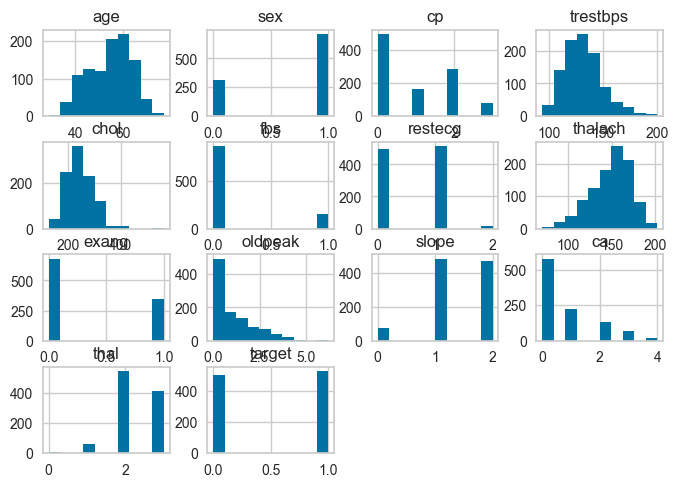

In [4]:
# Let's see our data distribution using hist
df.hist()

from the above information we can obtain various information like how data are distributed over which range.  


## Let's setup pycaret

In [8]:
clf = setup(data=df, target='target', log_experiment=True, experiment_name='Heart_Disease_Detection_E1')
best_model = compare_models()

,Description,Value
0,Session id,3548
1,Target,target
2,Target type,Binary
3,Original data shape,"(1025, 14)"
4,Transformed data shape,"(1025, 14)"
5,Transformed train set shape,"(717, 14)"
6,Transformed test set shape,"(308, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


2024/05/07 17:18:30 INFO mlflow.tracking.fluent: Experiment with name 'Heart_Disease_Detection_E1' does not exist. Creating a new experiment.


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9874,0.9990,0.9945,0.9823,0.9881,0.9748,0.9756,0.0160
catboost,CatBoost Classifier,0.9874,0.9926,0.9918,0.9842,0.9878,0.9748,0.9752,0.3170
rf,Random Forest Classifier,0.9846,0.9966,0.9918,0.9796,0.9853,0.9692,0.9700,0.0180
dt,Decision Tree Classifier,0.9790,0.9789,0.9864,0.9737,0.9797,0.9580,0.9587,0.0030
xgboost,Extreme Gradient Boosting,0.9776,0.9918,0.9891,0.9695,0.9787,0.9552,0.9564,0.0100
gbc,Gradient Boosting Classifier,0.9609,0.9866,0.9674,0.9588,0.9624,0.9217,0.9233,0.0130
ada,Ada Boost Classifier,0.8856,0.9530,0.8996,0.8828,0.8897,0.7709,0.7739,0.0090
qda,Quadratic Discriminant Analysis,0.8285,0.9190,0.8590,0.8197,0.8373,0.6563,0.6603,0.0040
lr,Logistic Regression,0.8187,0.9001,0.8670,0.7998,0.8308,0.6361,0.6410,0.2990
nb,Naive Bayes,0.7992,0.8876,0.8426,0.7853,0.8119,0.5974,0.6011,0.0030


We have got best result with `Extra Tree Classifier` `et` with the **F1** score of `0.9881` and **Accuracy** of `0.9874` which is really a good result so so let's go with the **et** model.

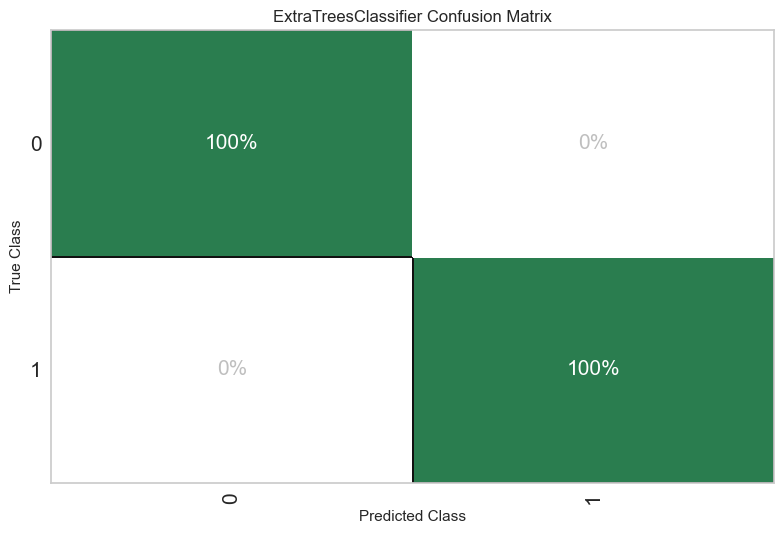

In [12]:
plot_model(best_model, plot='confusion_matrix', plot_kwargs={'percent': True})

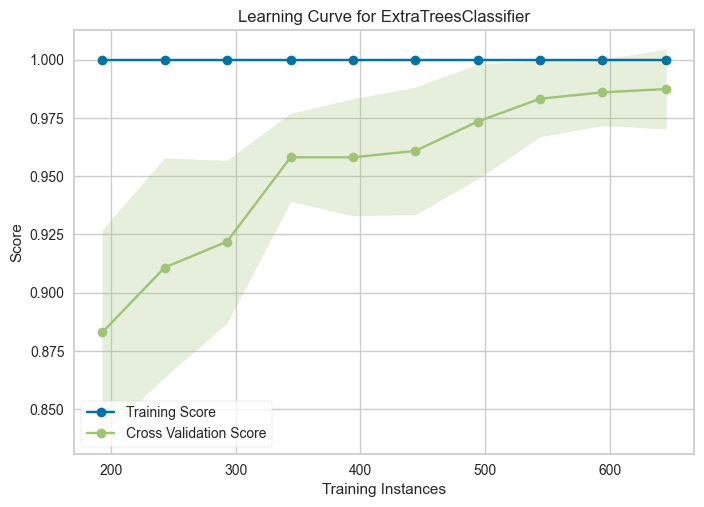

In [13]:
plot_model(best_model, plot='learning')

save_model(model=best_model, model_name='pipeline_model_HDD_V01')

create_api(best_model, 'best_model_api')

In [3]:
saved_model = load_model('./best_model_api')

Transformation Pipeline and Model Successfully Loaded
